In [1]:
# %pip install datasets
# %pip install accelerate -U

# 文本分类

In [1]:
from transformers import BertForSequenceClassification
from transformers import BertTokenizer
import torch

In [2]:
# !source /etc/network_turbo

In [3]:
model_name = 'IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)  # 预训练模型

In [4]:
texta = '鲸鱼是哺乳动物，所有哺乳动物都是恒温动物'
textb = '鲸鱼也是恒温动物'
output = model(torch.tensor([tokenizer.encode(texta, textb)]))
print(torch.nn.functional.softmax(output.logits, dim=-1))  # 测试一下

tensor([[0.0645, 0.9355]], grad_fn=<SoftmaxBackward0>)


准备数据集

In [5]:
from datasets import load_dataset, Features, Value

In [6]:
label_to_id = {  # 分类
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [7]:
# 明确地定义CSV数据的特征描述
features = Features({
    '类别': Value('string'),
    '通知内容': Value('string')
})

# 使用提供的特征描述加载数据集
dataset = load_dataset('csv', data_files='../data/combined_data.csv', features=features)

# 预览数据集
print(dataset)

Found cached dataset csv (/home/wangfiox/.cache/huggingface/datasets/csv/default-cfa277c67e6d8ee4/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['类别', '通知内容'],
        num_rows: 307
    })
})


In [8]:
def preprocess_function(batch):
    # 对通知内容进行分词，并返回结果
    encoding = tokenizer(batch['通知内容'], truncation=True, padding='max_length', max_length=128)  # 分词，截断，填充
    encoding["labels"] = [label_to_id[label] for label in batch["类别"]]  # 使用label_to_id将类别名转换为ID
    return encoding


# 使用map函数进行预处理
encoded_dataset = dataset['train'].map(preprocess_function, batched=True).train_test_split(test_size=0.05)

train_dataset = encoded_dataset['train']
test_dataset = encoded_dataset['test']

Loading cached processed dataset at /home/wangfiox/.cache/huggingface/datasets/csv/default-cfa277c67e6d8ee4/0.0.0/6954658bab30a358235fa864b05cf819af0e179325c740e4bc853bcc7ec513e1/cache-0b8b8d35d81e2f35.arrow


In [9]:
# 输出训练集和测试集的大小
print(len(train_dataset))
print(len(test_dataset))

# 打印第一个样本的内容，带换行符
print(train_dataset[0])
# 输出：
# {'类别': '生活', '通知内容': '各位同学@所有人 今天晚上收到多名同学反馈在教学楼、活动中心和宿舍楼附近发现卖笔的人员，请大家不要轻信和购买，保护好自身财产安全', 'input_ids': [101, 1392, 855, 1398, 2110, 137, 2792, 3300, 782, 791, 1921, 3241, 677, 3119, 1168, 1914, 1399, 1398, 2110, 1353, 7668, 1762, 3136, 2110, 3517, 510, 3833, 1220, 704, 2552, 1469, 2162, 5650, 3517, 7353, 6818, 1355, 4385, 1297, 5011, 4638, 782, 1447, 8024, 6435, 1920, 2157, 679, 6206, 6768, 928, 1469, 6579, 743, 8024, 924, 2844, 1962, 5632, 6716, 6568, 772, 2128, 1059, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'labels': 9}

291
16
{'类别': '企业参观与就业', '通知内容': '【腾讯 - 暑期实习投递意向调研】@所有人 六月啦！先祝大家六一快乐！🎉🎉 为了未来能给大家提供更精准和高效的求职体验，我们计划对当下在校学生的求职选择做个调研，问卷时长 1 分钟，动动手指即可有机会抽取精美礼品～ ✨期待同学们的参与！ ⚠️本问卷为匿名形式，只用于求职调研，请大家放心作答！ [暑期实习投递意向调研问卷](https://wj.qq.com/s2/12454976/2c82/) ps. 腾讯实习生招聘启动至今仍有部分岗位在招，欢迎大家登录 [join.qq.com](http://join.qq.com/) 投递！', 'input_ids': [101, 523, 5596, 6380, 118, 3264, 3309, 2141, 739, 2832, 6853, 2692, 1403, 6444, 4777, 524, 137, 2792, 3300, 782, 1063, 3299, 1568, 8013, 1044, 4867, 1920, 2157, 1063, 671, 2571, 727, 8013, 100, 711, 749, 3313, 3341, 5543, 5314, 1920, 2157, 2990, 897, 3291, 5125, 1114, 1469, 7770, 3126, 4638, 3724, 5466, 860, 7741, 8024, 2769, 812, 6369, 1153, 2190, 2496, 678, 1762, 3413, 2110, 4495, 4638, 3724, 5466, 6848, 2885, 976, 702, 6444, 4777, 8024, 7309, 1318, 3198, 7270, 122, 1146, 7164, 8024, 1220, 1220, 2797, 2900, 1315, 1377, 3300, 3322, 833, 2853, 1357, 5125, 5401, 4851, 1501, 8080, 501, 3309, 2521, 1398, 2110, 812, 4638, 1346, 680, 8013, 100, 3315, 7309, 1318, 711, 1280, 1399

模型训练

In [10]:
# 修改模型输出
num_labels = len(label_to_id)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

# 打印模型的最后一层，验证是12分类
print(model.classifier)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at IDEA-CCNL/Erlangshen-Roberta-110M-Sentiment and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([12, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([12]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Linear(in_features=768, out_features=12, bias=True)


In [11]:
from transformers import Trainer, TrainingArguments

# 定义训练参数
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="steps",
    eval_steps=10,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=128,
    num_train_epochs=3,
    save_steps=50,
    logging_steps=20,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir='./logs',
    load_best_model_at_end=True,
)

# 创建Trainer对象
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=None,  # 如果你需要在验证时计算评估指标，请提供一个compute_metrics函数
)

In [14]:
# 开始训练
trainer.train()

                                               
 67%|██████▋   | 10/15 [01:18<00:37,  7.57s/it]

{'eval_loss': nan, 'eval_runtime': 0.6611, 'eval_samples_per_second': 24.202, 'eval_steps_per_second': 1.513, 'epoch': 2.0}


100%|██████████| 15/15 [02:05<00:00,  8.35s/it]

{'train_runtime': 125.3199, 'train_samples_per_second': 6.966, 'train_steps_per_second': 0.12, 'train_loss': 0.0, 'epoch': 3.0}


TrainOutput(global_step=15, training_loss=0.0, metrics={'train_runtime': 125.3199, 'train_samples_per_second': 6.966, 'train_steps_per_second': 0.12, 'train_loss': 0.0, 'epoch': 3.0})

In [12]:
# 查看训练结果
trainer.log_metrics

<bound method log_metrics of <transformers.trainer.Trainer object at 0x7fe10e24ea10>>

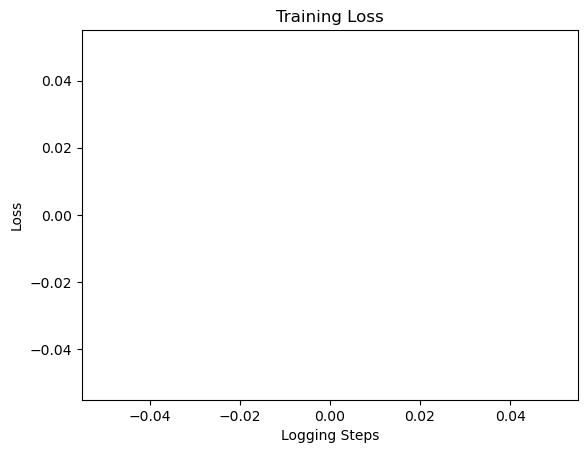

In [13]:
import matplotlib.pyplot as plt

# 获取训练的历史
history = trainer.state.log_history

# 提取损失值
loss_values = [entry['loss'] for entry in history if 'loss' in entry]

# 绘制损失曲线
plt.plot(loss_values)
plt.title('Training Loss')
plt.xlabel('Logging Steps')
plt.ylabel('Loss')
plt.show()

In [14]:
# 按日期时间保存模型
from datetime import datetime

# 获取当前日期和时间
now = datetime.now()
timestamp = now.strftime("%Y%m%d_%H%M%S")

# 使用日期和时间作为模型的保存名
model_save_path = f"./model_{timestamp}"
model.save_pretrained(model_save_path)
tokenizer.save_pretrained(model_save_path)

print(f"Model saved to {model_save_path}")

Model saved to ./model_20231215_103751


## 评估模型

In [15]:
from transformers import BertForSequenceClassification, BertTokenizer
import torch

In [16]:
# 加载模型
model_save_path = './model_20230915_145716'
model = BertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = BertTokenizer.from_pretrained(model_save_path)

OSError: Can't load the configuration of './model_20230915_145716'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure './model_20230915_145716' is the correct path to a directory containing a config.json file

In [22]:
label_to_id = {
    "升学": 0,
    "志愿": 1,
    "教务": 2,
    "思政": 3,
    "心理": 4,
    "灾害": 5,
    "作业与考试": 6,
    "竞赛与机会": 7,
    "企业参观与就业": 8,
    "生活": 9,
    "重要通知": 10,
    "垃圾与乐子": 11,
}

# 将label_to_id进行反转
id_to_label = {value: key for key, value in label_to_id.items()}
print(id_to_label)

{0: '升学', 1: '志愿', 2: '教务', 3: '思政', 4: '心理', 5: '灾害', 6: '作业与考试', 7: '竞赛与机会', 8: '企业参观与就业', 9: '生活', 10: '重要通知', 11: '垃圾与乐子'}


In [23]:
def predict_label(text, model, tokenizer, id_to_label):
    # 对文本进行编码
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding='max_length', max_length=128)

    # 将输入移到模型所在的设备上
    inputs = {key: val.to(model.device) for key, val in inputs.items()}

    # 使用模型进行预测
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted_label_id = logits.argmax(-1).item()

    # 获取预测的类别名
    predicted_label = id_to_label[predicted_label_id]

    return predicted_label

In [24]:
# 使用这个函数
text = "【第九届中国国际“互联网+”大学生创新创业大赛】 《教育部关于举办第九届中国国际“互联网+”大学生创新创业大赛的通知》已发（[https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。](https://mp.weixin.qq.com/s/0j9OTd3Iv4uyqNhW9e6MRA），请大家把此通知转发给同学们，鼓励同学们积极报名，筹备比赛项目，具体学院比赛报名截止时间待校区和省教育厅通知后另行发布，谢谢大家。)（咱们学校很多课程项目都可以拿到省赛铜奖，请大家积极报名） 此比赛也请大家积极挖掘自己的大一立项、大创国创项目、课程项目等。积极报名@所有人"
predicted_label = predict_label(text, model, tokenizer, id_to_label)
print(f"The predicted label for the text is: {predicted_label}")


The predicted label for the text is: 升学
